In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from feature_extraction import Featurizer
pd.set_option('display.max_columns', None)

pd.options.mode.chained_assignment = None  # removes some annoying warnings

In [3]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

drop_cols = ["Name", "Ticket", "Cabin", "Embarked", "PassengerId"]
featurizer = Featurizer(drop_cols)
train_df, val_df = featurizer.get_train_features(train_df)

In [4]:
train_df.fillna({"Age": train_df["Age"].median()}, inplace=True)
val_df.fillna({"Age": train_df["Age"].median()}, inplace=True)

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

%matplotlib inline

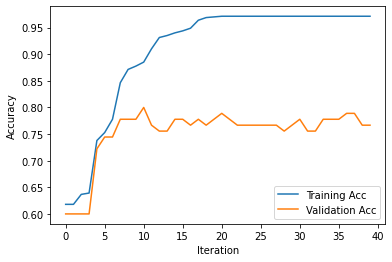

In [7]:
train_acc = []
val_acc = []
for i in tqdm(range(40)):
    model = GradientBoostingClassifier(n_estimators=2, max_depth=i+1)
    model.fit(train_df.drop("Survived", axis=1), train_df["Survived"])
    y_pred = model.predict(train_df.drop("Survived", axis=1))
    train_acc.append(
        accuracy_score(train_df["Survived"].values.squeeze(), y_pred.squeeze())
    )
    
    y_pred = model.predict(val_df.drop("Survived", axis=1))
    val_acc.append(
        accuracy_score(val_df["Survived"].values.squeeze(), y_pred.squeeze())
    )
    
plt.plot(train_acc, label="Training Acc")
plt.plot(val_acc, label="Validation Acc")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()